In [1]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('data_employee_clean (2).csv')
df = df[df['Sales (Domestic Ultimate Total USD)'] > 0]
df[''
df.head()

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,3834.368271,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,100.000000,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,4.000000,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,100.000000,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.000000,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0


In [87]:
df['Sales (Domestic Ultimate Total USD)'].min()

46.0

In [88]:
df['Sales (Domestic Ultimate Total USD)'].max()

318476400000.0

In [90]:
range1 = 10**6
range2 = 10**10

r1_df = df[df['Sales (Domestic Ultimate Total USD)'] < range1]
r2_df = df[df['Sales (Domestic Ultimate Total USD)'] > range1 and df['Sales (Domestic Ultimate Total USD)'] > range2]
r3_df = df[df['Sales (Domestic Ultimate Total USD)'] < range2]
r1_df


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  float64
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  float64
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Entity Type                          29182 non-null  object 
 10  Parent Company                       28668 non-null  object 
 11  Parent Country              

<Axes: xlabel='Sales (Domestic Ultimate Total USD)', ylabel='Count'>

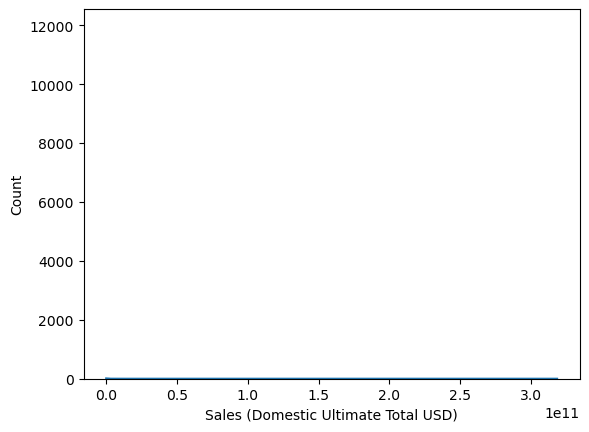

In [89]:
import seaborn as sns
sns.histplot(df['Sales (Domestic Ultimate Total USD)'], kde=True)

<Axes: xlabel='Employees (Single Site)', ylabel='Count'>

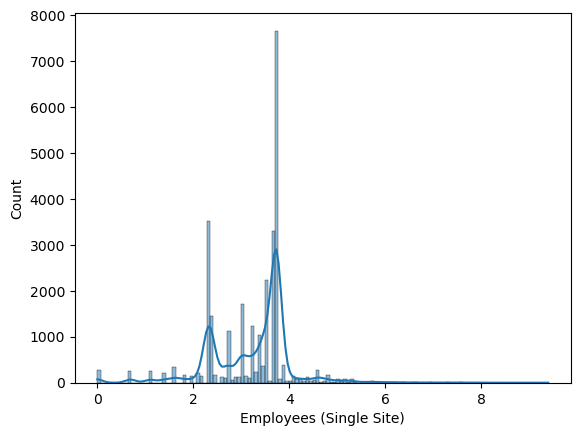

In [16]:
sns.histplot(np.log(df['Sales)']), kde=True)

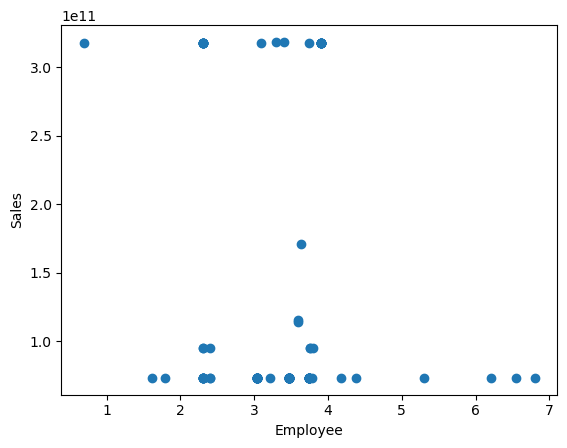

In [65]:
plt.scatter(np.log(big_df['Employees (Single Site)']), big_df['Sales (Domestic Ultimate Total USD)'])
plt.xlabel('Employee')
plt.ylabel('Sales')
plt.show()

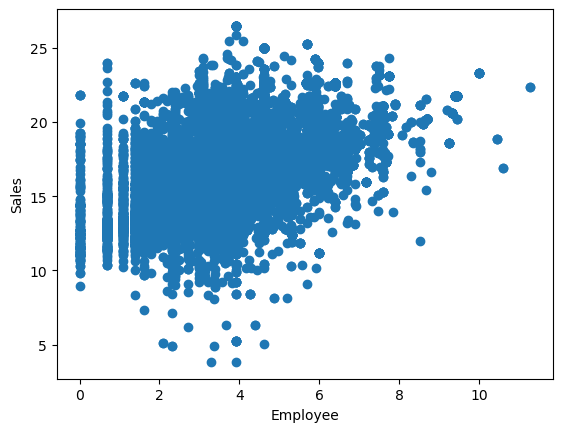

In [9]:
plt.scatter(np.log(df['Employees (Domestic Ultimate Total)']), np.log(df['Sales (Domestic Ultimate Total USD)']))
plt.xlabel('Employee')
plt.ylabel('Sales')
plt.show()

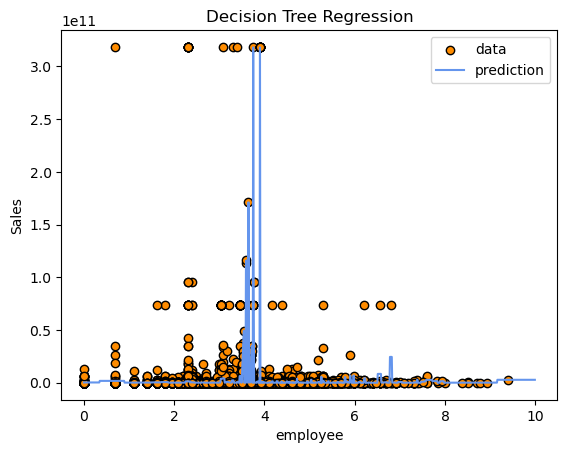

In [76]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Generate some example data
X = np.array(np.log(small_df['Employees (Single Site)'])).reshape(-1,1)
y = small_df['Sales (Domestic Ultimate Total USD)']

# Create a decision tree regressor
regressor = DecisionTreeRegressor(max_depth=50)  # You can adjust the max_depth parameter

# Fit the model to the data
regressor.fit(X, y)

# Make predictions
X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
y_pred = regressor.predict(X_test)

# Plot the results
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X, y, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="prediction")
plt.xlabel("employee")
plt.ylabel("Sales")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Sample data for demonstration
X = np.array(np.log(small_df['Employees (Single Site)'])).reshape(-1,1)
y = small_df['Sales (Domestic Ultimate Total USD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 50)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 9.2539579554733e+19
Mean Absolute Error: 1197702849.90191


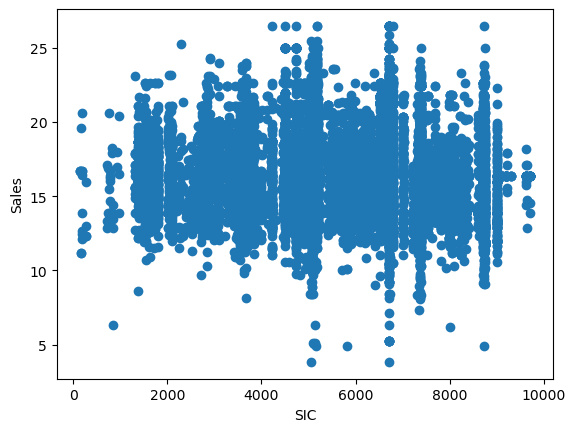

In [13]:
plt.scatter(df['SIC Code'], np.log(df['Sales (Domestic Ultimate Total USD)']))
plt.xlabel('SIC')
plt.ylabel('Sales')
plt.show()

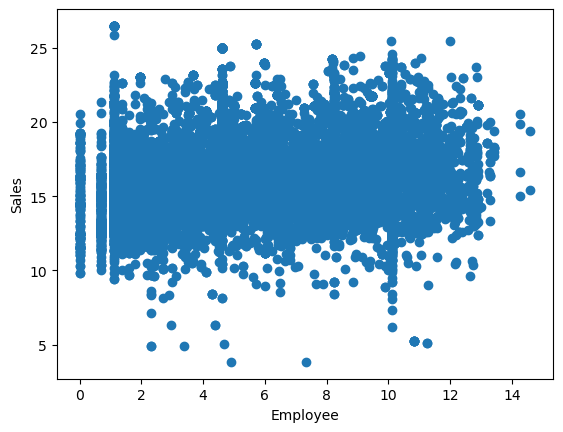

In [10]:
plt.scatter(np.log(df['Employees (Global Ultimate Total)']), np.log(df['Sales (Domestic Ultimate Total USD)']))
plt.xlabel('Employee')
plt.ylabel('Sales')
plt.show()

In [3]:
columns_to_drop = ['AccountID', 'Company', 'Industry', '8-Digit SIC Code', '8-Digit SIC Description','Year Found','Company Description', 'Square Footage', 'Company Status (Active/Inactive)', 'Import/Export Status', 'Fiscal Year End']
df.drop(columns = columns_to_drop, inplace = True)
df

,LATITUDE,LONGITUDE,SIC Code,Entity Type,Parent Company,Parent Country,Ownership Type,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,7361.0,Subsidiary,FRANK RECRUITMENT GROUP PRIVATE LTD.,Singapore,Private,15.0,25.0,NaN,2.209224e+06,4.637871e+06,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,4449.0,Subsidiary,FORTITUDE SHIPPING PTE. LTD.,Singapore,Private,39.0,100.0,100.0,7.093536e+09,7.093536e+09,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,6719.0,Subsidiary,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,Private,4.0,4.0,4.0,1.026308e+06,1.026308e+06,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,6719.0,Subsidiary,WILMAR INTERNATIONAL LIMITED,Singapore,Private,10.0,100.0,100.0,7.339898e+10,7.339898e+10,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,6719.0,Parent,ASIA GREEN CAPITAL PTE. LTD.,Singapore,Private,NaN,4.0,4.0,4.322130e+05,4.322130e+05,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,1.355309,103.887857,6719.0,Subsidiary,SENDA INTERNATIONAL CAPITAL LIMITED,Hong Kong SAR,Private,NaN,50.0,6615.0,2.949122e+06,2.943975e+09,"Zhejiang Longsheng Group Co., Ltd.",China,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,1.0,0.0
29178,1.319605,103.898298,6719.0,Independent,NaN,NaN,Private,NaN,4.0,4.0,1.026308e+06,1.026308e+06,NaN,NaN,NaN,0.0,0.0
29179,1.316363,103.924303,6726.0,Subsidiary,ABRDN HOLDINGS LIMITED,United Kingdom,Public,NaN,5.0,NaN,2.289731e+08,4.114318e+08,ABRDN HOLDINGS LIMITED,United Kingdom,ABRDN ASIA LIMITED,1.0,0.0
29180,1.295595,103.858968,6719.0,Subsidiary,ENCYCLIA 1 INVESTMENTS PTE. LTD.,Singapore,Private,10.0,4.0,4.0,1.026308e+06,1.026308e+06,65EP INVESTMENT I PTE. LTD.,Singapore,65EP INVESTMENT I PTE. LTD.,0.0,0.0


In [4]:
def get_country_from_coordinates(latitude, longitude):
    # Initialize Nominatim geocoder
    geolocator = Nominatim(user_agent="country_finder")

    # Get location information based on latitude and longitude
    location = geolocator.reverse((latitude, longitude), language='en')

    # Extract the country from the location information
    country = location.raw['address'].get('country', None)

    return country

In [5]:
host_country = []
for i in range(len(df)):
    row = df.loc[i]
    if (pd.isna(row['LATITUDE']) and pd.isna(row['LONGITUDE']!= '')):
        country = get_country_from_coordinates(float(row['LATITUDE']), float(row['LONGITUDE']))
    else:
        country = row['Parent Country']
    host_country.append(country)
host_country   

['Singapore',
 'Singapore',
 'Hong Kong SAR',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Netherlands',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Cayman Islands',
 'Singapore',
 'Singapore',
 'Luxembourg',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Switzerland',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Cayman Islands',
 'Singapore',
 'Singapore',
 'Singapore',
 'Spain',
 'Singapore',
 'Singapore',
 'Singapore',
 'Denmark',
 'Singapore',
 'Singapore',
 'India',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 'Singapore',
 nan,
 'Singapore',
 'United Kingdom',
 'Singapore',
 'Singapore',
 'Singapore',
 'Cayman Islands',
 'Switzerland',
 'Japan',
 'Singapore',
 'Singapore',
 'Singapore',
 'Switzerland',
 'Singapore',
 nan,
 'Singapore',
 'Japan',
 'Singapore',
 'Singa

In [6]:
df['Company\'s location'] = host_country
df

,LATITUDE,LONGITUDE,SIC Code,Entity Type,Parent Company,Parent Country,Ownership Type,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Company's location
0,1.285495,103.843852,7361.0,Subsidiary,FRANK RECRUITMENT GROUP PRIVATE LTD.,Singapore,Private,15.0,25.0,NaN,2.209224e+06,4.637871e+06,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0,Singapore
1,1.291294,103.827476,4449.0,Subsidiary,FORTITUDE SHIPPING PTE. LTD.,Singapore,Private,39.0,100.0,100.0,7.093536e+09,7.093536e+09,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0,Singapore
2,1.300144,103.857517,6719.0,Subsidiary,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,Private,4.0,4.0,4.0,1.026308e+06,1.026308e+06,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0,Hong Kong SAR
3,1.300785,103.791263,6719.0,Subsidiary,WILMAR INTERNATIONAL LIMITED,Singapore,Private,10.0,100.0,100.0,7.339898e+10,7.339898e+10,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0,Singapore
4,1.298759,103.859430,6719.0,Parent,ASIA GREEN CAPITAL PTE. LTD.,Singapore,Private,NaN,4.0,4.0,4.322130e+05,4.322130e+05,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0,Singapore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,1.355309,103.887857,6719.0,Subsidiary,SENDA INTERNATIONAL CAPITAL LIMITED,Hong Kong SAR,Private,NaN,50.0,6615.0,2.949122e+06,2.943975e+09,"Zhejiang Longsheng Group Co., Ltd.",China,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,1.0,0.0,Hong Kong SAR
29178,1.319605,103.898298,6719.0,Independent,NaN,NaN,Private,NaN,4.0,4.0,1.026308e+06,1.026308e+06,NaN,NaN,NaN,0.0,0.0,NaN
29179,1.316363,103.924303,6726.0,Subsidiary,ABRDN HOLDINGS LIMITED,United Kingdom,Public,NaN,5.0,NaN,2.289731e+08,4.114318e+08,ABRDN HOLDINGS LIMITED,United Kingdom,ABRDN ASIA LIMITED,1.0,0.0,United Kingdom
29180,1.295595,103.858968,6719.0,Subsidiary,ENCYCLIA 1 INVESTMENTS PTE. LTD.,Singapore,Private,10.0,4.0,4.0,1.026308e+06,1.026308e+06,65EP INVESTMENT I PTE. LTD.,Singapore,65EP INVESTMENT I PTE. LTD.,0.0,0.0,Singapore


In [7]:
url = 'https://www.worldometers.info/world-population/population-by-country/'
population = pd.read_html(url)
population = population[0]
population

,#,Country (or dependency),Population (2023),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,1428627663,0.81 %,11454490,481,2973190,-486136,2.0,28.0,36 %,17.76 %
1,2,China,1425671352,-0.02 %,-215985,152,9388211,-310220,1.2,39.0,65 %,17.72 %
2,3,United States,339996563,0.50 %,1706706,37,9147420,999700,1.7,38.0,83 %,4.23 %
3,4,Indonesia,277534122,0.74 %,2032783,153,1811570,-49997,2.1,30.0,59 %,3.45 %
4,5,Pakistan,240485658,1.98 %,4660796,312,770880,-165988,3.3,21.0,35 %,2.99 %
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,Montserrat,4386,-0.09 %,-4,44,100,0,1.6,44.0,11 %,0.00 %
230,231,Falkland Islands,3791,0.29 %,11,0,12170,0,1.6,40.0,62 %,0.00 %
231,232,Niue,1935,0.05 %,1,7,260,0,2.4,36.0,41 %,0.00 %
232,233,Tokelau,1893,1.18 %,22,189,10,0,2.6,27.0,0 %,0.00 %


In [8]:
merged_df = pd.merge(df,population[['Country (or dependency)','Population  (2023)']], left_on ='Company\'s location', right_on='Country (or dependency)', how='left')
merged_df.drop('Country (or dependency)', axis=1, inplace=True)
merged_df

,LATITUDE,LONGITUDE,SIC Code,Entity Type,Parent Company,Parent Country,Ownership Type,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Company's location,Population (2023)
0,1.285495,103.843852,7361.0,Subsidiary,FRANK RECRUITMENT GROUP PRIVATE LTD.,Singapore,Private,15.0,25.0,NaN,2.209224e+06,4.637871e+06,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0,Singapore,6014723.0
1,1.291294,103.827476,4449.0,Subsidiary,FORTITUDE SHIPPING PTE. LTD.,Singapore,Private,39.0,100.0,100.0,7.093536e+09,7.093536e+09,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0,Singapore,6014723.0
2,1.300144,103.857517,6719.0,Subsidiary,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,Private,4.0,4.0,4.0,1.026308e+06,1.026308e+06,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0,Hong Kong SAR,NaN
3,1.300785,103.791263,6719.0,Subsidiary,WILMAR INTERNATIONAL LIMITED,Singapore,Private,10.0,100.0,100.0,7.339898e+10,7.339898e+10,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0,Singapore,6014723.0
4,1.298759,103.859430,6719.0,Parent,ASIA GREEN CAPITAL PTE. LTD.,Singapore,Private,NaN,4.0,4.0,4.322130e+05,4.322130e+05,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0,Singapore,6014723.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,1.355309,103.887857,6719.0,Subsidiary,SENDA INTERNATIONAL CAPITAL LIMITED,Hong Kong SAR,Private,NaN,50.0,6615.0,2.949122e+06,2.943975e+09,"Zhejiang Longsheng Group Co., Ltd.",China,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,1.0,0.0,Hong Kong SAR,NaN
29178,1.319605,103.898298,6719.0,Independent,NaN,NaN,Private,NaN,4.0,4.0,1.026308e+06,1.026308e+06,NaN,NaN,NaN,0.0,0.0,NaN,NaN
29179,1.316363,103.924303,6726.0,Subsidiary,ABRDN HOLDINGS LIMITED,United Kingdom,Public,NaN,5.0,NaN,2.289731e+08,4.114318e+08,ABRDN HOLDINGS LIMITED,United Kingdom,ABRDN ASIA LIMITED,1.0,0.0,United Kingdom,67736802.0
29180,1.295595,103.858968,6719.0,Subsidiary,ENCYCLIA 1 INVESTMENTS PTE. LTD.,Singapore,Private,10.0,4.0,4.0,1.026308e+06,1.026308e+06,65EP INVESTMENT I PTE. LTD.,Singapore,65EP INVESTMENT I PTE. LTD.,0.0,0.0,Singapore,6014723.0


In [9]:
correlation_1 = merged_df['Population  (2023)'].corr(merged_df['Sales (Domestic Ultimate Total USD)'])
correlation_2 = merged_df['Population  (2023)'].corr(merged_df['Sales (Global Ultimate Total USD)'])
print(correlation_1)
print(correlation_2)

-0.008376958501233626
0.03940666558364418


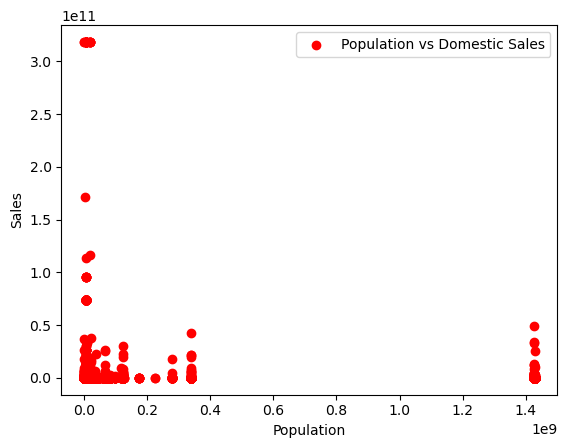

In [10]:
# plt.subplot(2,1,1)
plt.scatter(merged_df['Population  (2023)'], merged_df['Sales (Domestic Ultimate Total USD)'], label = 'Population vs Domestic Sales', color = 'r')
# plt.scatter(merged_df['Population  (2023)'], merged_df['Sales (Global Ultimate Total USD)'], label = 'Population vs Global Sales')
plt.xlabel('Population')
plt.ylabel('Sales')
plt.legend()
plt.show()

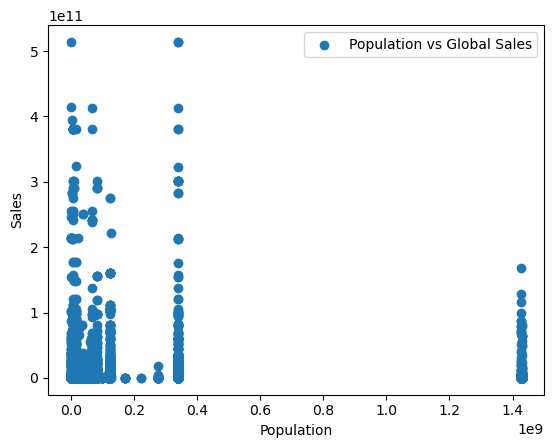

In [11]:
# plt.scatter(merged_df['Population  (2023)'], merged_df['Sales (Domestic Ultimate Total USD)'], label = 'Population vs Domestic Sales')
plt.scatter(merged_df['Population  (2023)'], merged_df['Sales (Global Ultimate Total USD)'], label = 'Population vs Global Sales')
plt.xlabel('Population')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [13]:
# long = list(merged_df['LONGITUDE'])
# lat = list(merged_df['LATITUDE'])
# sales_domestic = list(merged_df['Sales (Domestic Ultimate Total USD)'])

# z = [
#     [
#         sales_domestic[i] if i == j else 0
#         for j in range(len(lat))
#     ]
#     for i in range(len(long))
# ]




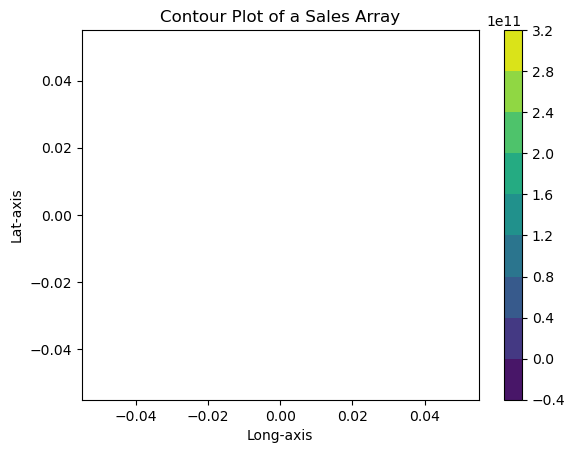

In [14]:
# plt.contourf(long, lat, z, cmap='viridis')  # Replace 'viridis' with your preferred colormap
# plt.colorbar()  # Add a colorbar
# plt.title('Contour Plot of a Sales Array')
# plt.xlabel('Long-axis')
# plt.ylabel('Lat-axis')
# plt.show()

In [31]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import statistics

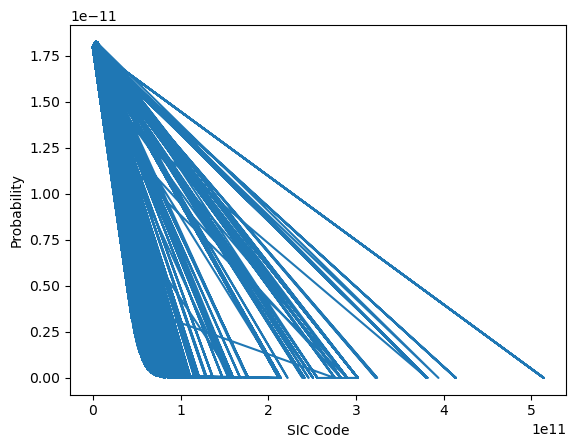

In [34]:
sales = np.log(df['Sales (Global Ultimate Total USD)'])
  
# Calculating mean and standard deviation 
mean = statistics.mean(SIC) 
sd = statistics.stdev(SIC) 
  
plt.plot(SIC, norm.pdf(SIC, mean, sd))
plt.xlabel('SIC Code')
plt.ylabel('Probability')
plt.show() 

In [29]:
import pandas as pd

# Example DataFrame
data = pd.DataFrame({
    'column1': [1, 2, 3, 4, 5],
    'column2': ['A', 'B', 'C', 'D', 'E']
})

# Condition for splitting (e.g., values in 'column1' greater than 2)
condition = data['column1'] > 2

# Splitting into two groups
group1 = data[condition]
group2 = data[~condition]

group1

,column1,column2
2,3,C
3,4,D
4,5,E
